# INDIAN STARTUP ECOSYSTEM PROJECT



## General

India boasts one of the globe's most rapidly growing economies and in the past decade, we have observed a substantial rise 
in unicorn startups within the Indian startup ecosystem, exerting a global influence. While startups may be categorized as
small businesses, their potential for impact on economic growth is immense. They play a pivotal role in generating employment opportunities, thereby bolstering overall job market conditions and contributing to a more robust economy. Furthermore, startups foster innovation and inject healthy competition, thereby enhancing economic vitality.

## Questions: 

1. Does the type of industry affect the success of getting funded?

2. Can location affect the success of receiving funding from investors?

3. At which stage do start-ups get more funding from investors?

4. Which type of investors invest the most money?

5. Can the age of the startup affect the sum of money received from investors ?



## Hypothesis: 

###### NULL: Technological industries do not have a higher success rate of being funded 

###### ALTERNATE: Technological industries have a higher success rate of being funded

In [754]:
#Import All Necessary Packages

import pyodbc
import pandas as pd
import numpy as np
import plotly.express as px
from dotenv import load_dotenv
from dotenv import dotenv_values
import os
from scipy import stats
from sqlalchemy import create_engine
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

LOAD ALL THE DATASETS
1. Load 2020 and 2021 datasets from Microsoft SQL server
2. Load  2019 dataset from onedrive
3. Load 2018 dataset from a github repository 

In [755]:
# Load environment variables from .env file 
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"



In [756]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [757]:
# Load 2020 dataset
query = 'SELECT * FROM LP1_startup_funding2020'
data_2020 = pd.read_sql_query(query, connection)

In [758]:
data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [759]:
# Load 2021 dataset

query = "Select * from dbo.LP1_startup_funding2021"

data_2021 = pd.read_sql(query, connection)


In [760]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [761]:
# load 2019 dataset
data_2019 = pd.read_csv("datasets/startup_funding2019.csv")


In [762]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [763]:
#load 2018 dataset 
data_2018= pd.read_csv("datasets\startup_funding2018.csv")
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


# Data Cleaning
  
  Starting from 2018 dataset

In [764]:
# select specific columns
data_2018= pd.read_csv('datasets\startup_funding2018.csv',
                       usecols=['Company Name','Industry','Round/Series','Amount','Location'])

# rename the columns for consistency 

#industry --> sector 
#Round/Series --> stage 
data_2018.rename(columns = {'Industry':'Sector'}, inplace = True)

data_2018.rename(columns = {'Round/Series':'Stage'}, inplace = True)

# Add founded, investor and funding year as a column 
data_2018['Founded'] = np.nan
data_2018['Investor'] = np.nan
data_2018['Funding Year'] = '2018'

#Change the funding year to integer type 

data_2018['Funding Year'] = data_2018['Funding Year'].astype(int)

In [765]:
#check the first 100 records of the dataset 
data_2018.head() 

,Company Name,Sector,Stage,Amount,Location,Founded,Investor,Funding Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India",NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",NaN,NaN,2018


In [766]:
#check the shape of the dataset 
data_2018.shape 

(526, 8)

In [767]:
#check if there are any Null Values
data_2018.isna().any()

Company Name    False
Sector          False
Stage           False
Amount          False
Location        False
Founded          True
Investor         True
Funding Year    False
dtype: bool

There are no null values in the 2018 dataset 

In [768]:
#Strip the location column to only the city-area. 
data_2018['Location'] = data_2018.Location.str.split(',').str[0]
data_2018['Location'].head()

0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
4    Hyderabad
Name: Location, dtype: object

In [769]:
#Strip the sector column to the first sector element.
data_2018['Sector'] = data_2018.Sector.str.split(',').str[0]
data_2018['Sector'].head()

0         Brand Marketing
1             Agriculture
2                  Credit
3      Financial Services
4    E-Commerce Platforms
Name: Sector, dtype: object

In [770]:
#get index of rows where 'Amount' column is in rupeess
get_index = data_2018.index[data_2018['Amount'].str.contains('₹')]

In [771]:
#Check the summary information about the 2018 dataset 
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  526 non-null    object 
 1   Sector        526 non-null    object 
 2   Stage         526 non-null    object 
 3   Amount        526 non-null    object 
 4   Location      526 non-null    object 
 5   Founded       0 non-null      float64
 6   Investor      0 non-null      float64
 7   Funding Year  526 non-null    int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 30.9+ KB


In [772]:
#To convert the column to a numerical one, there the need to remove some symbols including commas and currency

data_2018['Amount'] = data_2018['Amount'].apply(lambda x:str(x).replace('₹', ''))

data_2018['Amount'] = data_2018['Amount'].apply(lambda x:str(x).replace('$', ''))

data_2018['Amount'] = data_2018['Amount'].apply(lambda x:str(x).replace(',', ''))

data_2018['Amount'] = data_2018['Amount'].replace('—', np.nan)

In [773]:
# convert the amount column to numeric data type
data_2018['Amount'] = pd.to_numeric(data_2018['Amount'], errors='coerce')

In [774]:
#Check the final dataset information. 
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  526 non-null    object 
 1   Sector        526 non-null    object 
 2   Stage         526 non-null    object 
 3   Amount        378 non-null    float64
 4   Location      526 non-null    object 
 5   Founded       0 non-null      float64
 6   Investor      0 non-null      float64
 7   Funding Year  526 non-null    int32  
dtypes: float64(3), int32(1), object(4)
memory usage: 30.9+ KB


In [775]:
#Convert the rows with rupees to dollars
#Multiply the rupees values in the amount column with 0.012 which is the conversion rate 

data_2018.loc[get_index,['Amount']]=data_2018.loc[get_index,['Amount']].values*0.012

data_2018.loc[:,['Amount']].head()


,Amount
0,250000.0
1,480000.0
2,780000.0
3,2000000.0
4,NaN


In [776]:
data_2018.loc[(178)]

Company Name                                       BuyForexOnline
Sector                                                     Travel
Stage           https://docs.google.com/spreadsheets/d/1x9ziNe...
Amount                                                  2000000.0
Location                                                Bangalore
Founded                                                       NaN
Investor                                                      NaN
Funding Year                                                 2018
Name: 178, dtype: object

In [777]:
data_2018.loc[178, ['Stage']] = ['']

data_2018['Stage'] = data_2018['Stage'].apply(lambda x:str(x).replace('Undisclosed', ''))

In [778]:
#find duplicates 
duplicate = data_2018[data_2018.duplicated()]

duplicate

,Company Name,Sector,Stage,Amount,Location,Founded,Investor,Funding Year
348,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,NaN,NaN,2018


In [779]:
#drop duplicates 

data_2018 = data_2018.drop_duplicates(keep='first')


Cleaning 2019 DtaSet

In [780]:
#select specific columns 
 
data_2019 = pd.read_csv('datasets/startup_funding2019.csv', usecols = ['Company/Brand','Founded','HeadQuarter','Sector','Investor','Amount($)','Stage'])

# rename the columns for consistency 

#Company/Brand  --> Company Name 
#HeadQuarter --> Location 
#Amount($)  --> Amount 

data_2019.rename(columns = {'Company/Brand':'Company Name'}, inplace = True)

data_2019.rename(columns = {'HeadQuarter':'Location'}, inplace = True)

data_2019.rename(columns = {'Amount($)':'Amount'}, inplace = True)

# Add the funding year as a column 

data_2019['Funding Year'] = "2019"

#Change the funding year to integer type

data_2019['Funding Year'] = data_2019['Funding Year'].astype(int)

In [781]:
#check the shape of the dataset 
data_2019.shape

(89, 8)

In [782]:
#check the first 5 records of the dataset 
data_2019.head()

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [783]:
#check the summarized information on the 2019 dataset 
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  89 non-null     object 
 1   Founded       60 non-null     float64
 2   Location      70 non-null     object 
 3   Sector        84 non-null     object 
 4   Investor      89 non-null     object 
 5   Amount        89 non-null     object 
 6   Stage         43 non-null     object 
 7   Funding Year  89 non-null     int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 5.3+ KB


In [784]:
#To convert the column to a numerical one, there the need to remove some symbols including commas and currency

data_2019['Amount'] = data_2019['Amount'].apply(lambda x:str(x).replace('₹', ''))

data_2019['Amount'] = data_2019['Amount'].apply(lambda x:str(x).replace('$', ''))

data_2019['Amount'] = data_2019['Amount'].apply(lambda x:str(x).replace(',', ''))

data_2019['Amount'] = data_2019['Amount'].replace('—', np.nan)

In [785]:
#Some rows-values in the amount column are undisclosed 
# Extract the rows with undisclosed funding information 

index_new = data_2019.index[data_2019['Amount']=='Undisclosed']
#Print the number of rows with such undisclosed values
print('The number of values with undisclosed amount is ', len(index_new))

The number of values with undisclosed amount is  12


In [786]:
#check out these records 
data_2019.loc[(index_new)]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
5,FlytBase,NaN,Pune,Technology,Undisclosed,Undisclosed,NaN,2019
6,Finly,NaN,Bangalore,SaaS,"Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN,2019
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,Venture Catalysts,Undisclosed,NaN,2019
14,Open Secret,NaN,NaN,Food tech,Matrix Partners,Undisclosed,NaN,2019
19,Azah Personal Care Pvt. Ltd.,2018.0,Gurugram,Health,"Kunal Bahl, Rohit Bansal.",Undisclosed,Pre series A,2019
23,DROR Labs Pvt. Ltd,2018.0,Delhi,Safety tech,Inflection Point Ventures,Undisclosed,NaN,2019
32,Pumpkart,2014.0,Chandigarh,E-marketplace,Dinesh Dua,Undisclosed,NaN,2019
45,Afinoz,NaN,Noida,Fintech,Fintech innovation lab,Undisclosed,NaN,2019
54,Ninjacart,2015.0,NaN,B2B Supply Chain,"Walmart, Flipkart",Undisclosed,NaN,2019
55,Binca Games,2014.0,Mumbai,Games,Sunil Gavaskar,Undisclosed,NaN,2019


In [787]:
#Since undisclosed amounts does not provide any intelligenc, 
#we decided to drop rows with such characteristics 
# Replace the undisclosed amounts with an empty string

data_2019['Amount'] = data_2019['Amount'].replace('Undisclosed', np.nan)

In [788]:
#check out these records 
data_2019.loc[(index_new)]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
5,FlytBase,NaN,Pune,Technology,Undisclosed,NaN,NaN,2019
6,Finly,NaN,Bangalore,SaaS,"Social Capital, AngelList India, Gemba Capital...",NaN,NaN,2019
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,Venture Catalysts,NaN,NaN,2019
14,Open Secret,NaN,NaN,Food tech,Matrix Partners,NaN,NaN,2019
19,Azah Personal Care Pvt. Ltd.,2018.0,Gurugram,Health,"Kunal Bahl, Rohit Bansal.",NaN,Pre series A,2019
23,DROR Labs Pvt. Ltd,2018.0,Delhi,Safety tech,Inflection Point Ventures,NaN,NaN,2019
32,Pumpkart,2014.0,Chandigarh,E-marketplace,Dinesh Dua,NaN,NaN,2019
45,Afinoz,NaN,Noida,Fintech,Fintech innovation lab,NaN,NaN,2019
54,Ninjacart,2015.0,NaN,B2B Supply Chain,"Walmart, Flipkart",NaN,NaN,2019
55,Binca Games,2014.0,Mumbai,Games,Sunil Gavaskar,NaN,NaN,2019


In [789]:
#Convert the Amount column to float 

data_2019['Amount'] = pd.to_numeric(data_2019['Amount'], errors='coerce')

In [790]:
#Check the first 5 rows of the dataset 
data_2019.head()

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


In [791]:
#Check the summary information of the dataset 
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  89 non-null     object 
 1   Founded       60 non-null     float64
 2   Location      70 non-null     object 
 3   Sector        84 non-null     object 
 4   Investor      89 non-null     object 
 5   Amount        77 non-null     float64
 6   Stage         43 non-null     object 
 7   Funding Year  89 non-null     int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 5.3+ KB


In [792]:
#Check if there are any NULL VALUES 
data_2019.isna().any().sum()

5

We plan to analyse it later although there are null values.

In [793]:
#find duplicates 

duplicate = data_2019[data_2019.duplicated()]

duplicate


,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year


NO duplicates

Cleaning 2020 dataset

In [794]:
#select specific columns
data_2020 = data_2020[['Company_Brand', 'Founded','HeadQuarter','Sector','Investor','Amount','Stage' ]]
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Venture Center,NaN,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0,None
4,Gramophone,2016.0,Indore,AgriTech,"Siana Capital Management, Info Edge",340000.0,None


In [795]:
# rename some columns 

data_2020.rename(columns = {'Company_Brand':'Company Name'}, inplace = True)

data_2020.rename(columns = {'HeadQuarter':'Location'}, inplace = True)

# Add the funding year as a column 


data_2020['Funding Year'] = "2020"

#Change the funding year to integer type

data_2020['Funding Year'] = data_2020['Funding Year'].astype(int)

In [796]:
# check the first 5 rows of the 2020 funding data
data_2020.head()

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,"Siana Capital Management, Info Edge",340000.0,None,2020


In [797]:
data_2020.shape

(1055, 8)

In [798]:
#Summary information the dataset 
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1055 non-null   object 
 1   Founded       842 non-null    float64
 2   Location      961 non-null    object 
 3   Sector        1042 non-null   object 
 4   Investor      1017 non-null   object 
 5   Amount        801 non-null    float64
 6   Stage         591 non-null    object 
 7   Funding Year  1055 non-null   int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 61.9+ KB


In [799]:
# convert the funded column to numeric data
data_2020['Founded'] = pd.to_numeric(data_2020['Founded'], errors='coerce').convert_dtypes(int)

In [800]:
#To convert the Amount column to a numeric, there the need to remove some symbols including commas and currency
data_2020['Amount'] = data_2020['Amount'].apply(lambda x:str(x).replace('$', ''))

data_2020['Amount'] = data_2020['Amount'].apply(lambda x:str(x).replace(',', ''))

data_2020['Amount'] = data_2020['Amount'].replace('—', np.nan)

In [801]:
#Find the number of rows with undisclosed amounts 
index1 = data_2020.index[data_2020['Amount']=='Undisclosed']
print('The total number of undisclosed records is', len(index1))

The total number of undisclosed records is 0


In [802]:
# convert undisclosed to NAN
data_2020['Amount'] = data_2020['Amount'].replace('Undisclosed', np.nan)

In [803]:
#print a summary information on the 2020 data 
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  1055 non-null   object
 1   Founded       842 non-null    Int64 
 2   Location      961 non-null    object
 3   Sector        1042 non-null   object
 4   Investor      1017 non-null   object
 5   Amount        1055 non-null   object
 6   Stage         591 non-null    object
 7   Funding Year  1055 non-null   int32 
dtypes: Int64(1), int32(1), object(6)
memory usage: 63.0+ KB


In [804]:
#Find the row with 887000 23000000 in the amount section
index1 = data_2020.index[data_2020['Amount']=='887000 23000000']
index1

Index([], dtype='int64')

In [805]:
#replace the values with the average 
avg = str((887000+23000000)/2)
data_2020.at[465, 'Amount'] = avg 


In [806]:
#print the row record to confirm
print(data_2020.iloc[(465)])

Company Name    True Balance
Founded                 2014
Location            Gurugram
Sector               Finance
Investor         Balancehero
Amount            11943500.0
Stage               Series C
Funding Year            2020
Name: 465, dtype: object


In [807]:
#Find the row with 800000000 to 850000000 in the amount section
index2 = data_2020.index[data_2020['Amount']=='800000000 to 850000000']


In [808]:
#replace the values with the average 
avg = str((800000000+850000000)/2)

data_2020.at[472, 'Amount'] = avg 



In [809]:
#print the row record to confirm 
print(data_2020.iloc[(472)])

Company Name                                             Eruditus
Founded                                                      2010
Location                                                   Mumbai
Sector                                                  Education
Investor        Bertelsmann India Investments, Sequoia Capital...
Amount                                                825000000.0
Stage                                                        None
Funding Year                                                 2020
Name: 472, dtype: object


In [810]:
#Convert the Amount column to numeric 

data_2020['Amount'] = pd.to_numeric(data_2020['Amount'], errors='coerce')

In [811]:
#print a summary information on the 2020 data 
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1055 non-null   object 
 1   Founded       842 non-null    Int64  
 2   Location      961 non-null    object 
 3   Sector        1042 non-null   object 
 4   Investor      1017 non-null   object 
 5   Amount        803 non-null    float64
 6   Stage         591 non-null    object 
 7   Funding Year  1055 non-null   int32  
dtypes: Int64(1), float64(1), int32(1), object(5)
memory usage: 63.0+ KB


In [812]:
duplicates = data_2020[data_2020.duplicated()]

duplicates

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
145,Krimanshi,2015,Jodhpur,Biotechnology company,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,2020
205,Nykaa,2012,Mumbai,Cosmetics,"Alia Bhatt, Katrina Kaif",NaN,None,2020
362,Byju’s,2011,Bangalore,EdTech,"Owl Ventures, Tiger Global Management",500000000.0,None,2020


In [813]:
#drop all duplicates and leave only one record 

data_2020 = data_2020.drop_duplicates(keep='first')

In [814]:
#Check the 2020 datatset information to confirm the datatypes 
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1052 non-null   object 
 1   Founded       839 non-null    Int64  
 2   Location      958 non-null    object 
 3   Sector        1039 non-null   object 
 4   Investor      1014 non-null   object 
 5   Amount        801 non-null    float64
 6   Stage         590 non-null    object 
 7   Funding Year  1052 non-null   int32  
dtypes: Int64(1), float64(1), int32(1), object(5)
memory usage: 70.9+ KB


In [815]:
#Check the first set of row 
data_2020.head()

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
0,Aqgromalin,2019,Chennai,AgriTech,Angel investors,200000.0,None,2020
1,Krayonnz,2019,Bangalore,EdTech,GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016,Indore,AgriTech,"Siana Capital Management, Info Edge",340000.0,None,2020


In [816]:
#Check the final shape of the data after preprocessing 
data_2020.shape

(1052, 8)

Clean 2021 dataset

In [817]:
#select specific columns 
data_2021 = data_2021[['Company_Brand','Founded','HeadQuarter','Sector','Investor','Amount','Stage']]
data_2021

,Company_Brand,Founded,HeadQuarter,Sector,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,"BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,"Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,"GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,"CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [818]:
# rename some columns 

data_2021.rename(columns = {'Company_Brand':'Company Name'}, inplace = True)

data_2021.rename(columns = {'HeadQuarter':'Location'}, inplace = True)


# Add the funding year to the data 


data_2021['Funding Year'] = "2021"

#Change the funding year to integer type

data_2021['Funding Year'] = data_2021['Funding Year'].astype(int)

In [819]:
# 2021 dataset information
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1209 non-null   object 
 1   Founded       1208 non-null   float64
 2   Location      1208 non-null   object 
 3   Sector        1209 non-null   object 
 4   Investor      1147 non-null   object 
 5   Amount        1206 non-null   object 
 6   Stage         781 non-null    object 
 7   Funding Year  1209 non-null   int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 71.0+ KB


In [820]:
# total undisclosed in the dataset
index5 = data_2021.index[data_2021['Amount']=='Undisclosed']

print(len(index5))


43


In [821]:
#print the row records 
data_2021.loc[(index5)].tail()

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
824,Avalon Labs,2017.0,Bangalore,FinTech,"Tanglin Ventures, Better Capital, Whiteboard C...",Undisclosed,Pre-series A,2021
827,Rezo.ai,2017.0,Noida,AI startup,"Devesh Sachdev, Bhavesh Manglani",Undisclosed,Seed,2021
833,Polygon,2017.0,Mumbai,Crypto,"Mark Cuban, MiH Ventures",Undisclosed,None,2021
846,Ingenium,2018.0,New Delhi,EdTech,Lead Angels,Undisclosed,Seed,2021
853,Celcius,2020.0,Mumbai,Logistics,Eaglewings Ventures,Undisclosed,Seed,2021


In [822]:
# Replace the Undisclosed with NAN

data_2021['Amount'] = data_2021['Amount'].replace('Undisclosed', np.nan)

In [823]:
#print the last 5 row records 
data_2021.loc[(index5)].tail()

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
824,Avalon Labs,2017.0,Bangalore,FinTech,"Tanglin Ventures, Better Capital, Whiteboard C...",NaN,Pre-series A,2021
827,Rezo.ai,2017.0,Noida,AI startup,"Devesh Sachdev, Bhavesh Manglani",NaN,Seed,2021
833,Polygon,2017.0,Mumbai,Crypto,"Mark Cuban, MiH Ventures",NaN,None,2021
846,Ingenium,2018.0,New Delhi,EdTech,Lead Angels,NaN,Seed,2021
853,Celcius,2020.0,Mumbai,Logistics,Eaglewings Ventures,NaN,Seed,2021


In [824]:
# number of upspark in Amount column
index6 = data_2021.index[data_2021['Amount']=='Upsparks']

print(len(index6)), index6

2


(None, Index([98, 111], dtype='int64'))

In [825]:
# display them
data_2021.loc[index6]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
98,FanPlay,2020.0,Computer Games,Computer Games,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
111,FanPlay,2020.0,Computer Games,Computer Games,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021


In [826]:
#drop the duplicate

data_2021 = data_2021.drop(labels=index6[1], axis=0)

In [827]:
#Rearrange the record data correctly 

data_2021.loc[index6[0], ['Amount', 'Stage']] = ['$1200000', '']


In [828]:
# dispaly the changes 
data_2021.iloc[98]

Company Name                        FanPlay
Founded                              2020.0
Location                     Computer Games
Sector                       Computer Games
Investor        Pritesh Kumar, Bharat Gupta
Amount                             $1200000
Stage                                      
Funding Year                           2021
Name: 98, dtype: object

In [829]:
# find element in amount with series C
index7 = data_2021.index[data_2021['Amount']=='Series C']

print(len(index7)), index7

2


(None, Index([242, 256], dtype='int64'))

In [830]:
# show the entry
data_2021.loc[index7]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,$22000000,Series C,None,2021
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,$22000000,Series C,None,2021


In [831]:
#since its duplicate  drop one 
data_2021 = data_2021.drop(labels=index7[1], axis=0)

In [832]:
#rearrange the columns entery 
data_2021.loc[index7[0], ['Sector', 'Location', 'Amount', 'Investor', 'Stage']] = ['Pharmaceuticals', '', '$22000000', '', 'Series C']

In [833]:
data_2021.loc[242]

Company Name    Fullife Healthcare
Founded                     2009.0
Location                          
Sector             Pharmaceuticals
Investor                          
Amount                   $22000000
Stage                     Series C
Funding Year                  2021
Name: 242, dtype: object

In [834]:
index8 = data_2021.index[data_2021['Amount']=='Seed']

print(index8)

Index([257, 1148], dtype='int64')


In [835]:
data_2021.loc[index8]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,$5000000,Seed,None,2021
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,1000000\t#REF!,Seed,None,2021


In [836]:
data_2021.loc[index8[0], ['Sector', 'Location', 'Amount', 'Investor', 'Stage']] = ['Electric Mobility', 'Gurugram', '$5000000', '', 'Seed']
data_2021.loc[index8[1], ['Amount', 'Investor', 'Stage']] = ['1000000', '', 'Seed']

In [837]:
data_2021.loc[257]

Company Name              MoEVing
Founded                    2021.0
Location                 Gurugram
Sector          Electric Mobility
Investor                         
Amount                   $5000000
Stage                        Seed
Funding Year                 2021
Name: 257, dtype: object

In [838]:
index9 = data_2021.index[data_2021['Amount']=='ah! Ventures']

print(index9)


Index([538], dtype='int64')


In [839]:
data_2021.loc[index9]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
538,Little Leap,2020.0,New Delhi,EdTech,Vishal Gupta,ah! Ventures,$300000,2021


In [840]:
data_2021.loc[index9, ['Amount', 'Stage']] = ['$300000', '']

In [841]:
data_2021.loc[538]

Company Name     Little Leap
Founded               2020.0
Location           New Delhi
Sector                EdTech
Investor        Vishal Gupta
Amount               $300000
Stage                       
Funding Year            2021
Name: 538, dtype: object

In [842]:
# Pre-series A
index10 = data_2021.index[data_2021['Amount']=='Pre-series A']

index10

Index([545], dtype='int64')

In [843]:
data_2021.loc[index10]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
545,AdmitKard,2016.0,Noida,EdTech,$1000000,Pre-series A,None,2021


In [844]:
# rearranging the values in amount, investor and stage
data_2021.at[545, 'Amount'] = '$1000000'
data_2021.at[545, 'Investor'] = ''
data_2021.at[545, 'Stage'] = 'Pre-series A'

In [845]:
data_2021.loc[index10]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
545,AdmitKard,2016.0,Noida,EdTech,,$1000000,Pre-series A,2021


In [846]:
# ITO angel network, letsventure
index11 = data_2021.index[data_2021['Amount']=='ITO Angel Network, LetsVenture']

index11

Index([551], dtype='int64')

In [847]:
data_2021.loc[index11]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
551,BHyve,2020.0,Mumbai,Human Resources,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000,2021


In [848]:
# rearranging 
data_2021.at[551, 'Amount'] = '$300000'
data_2021.at[551, 'Investor'] = 'Omkar Pandharkame, Ketaki Ogale, JITO Angel Network, LetsVenture'
data_2021.at[551, 'Stage'] = ''

In [849]:
data_2021.loc[index11]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
551,BHyve,2020.0,Mumbai,Human Resources,"Omkar Pandharkame, Ketaki Ogale, JITO Angel Ne...",$300000,,2021


In [850]:
# JITO Angel Network, LetsVenture
index12 = data_2021.index[data_2021['Amount']=='JITO Angel Network, LetsVenture']

index12

Index([677], dtype='int64')

In [851]:
data_2021.loc[index12]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000,2021


In [852]:
# rearranging 
data_2021.at[677, 'Amount'] = '$1000000'
data_2021.at[677, 'Investor'] = 'Sushil Agarwal, JITO Angel Network, LetsVenture'
data_2021.at[677, 'Stage'] = ''

In [853]:
data_2021.loc[index12]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"Sushil Agarwal, JITO Angel Network, LetsVenture",$1000000,,2021


In [854]:
index13 = data_2021.index[data_2021['Amount']=='nan']

data_2021['Amount'] = data_2021['Amount'].replace('nan', np.nan)

In [855]:
# replace $ and , to empty space, - to NAN
data_2021['Amount'] = data_2021['Amount'].apply(lambda x:str(x).replace('$', ''))

data_2021['Amount'] = data_2021['Amount'].apply(lambda x:str(x).replace(',', ''))

data_2021['Amount'] = data_2021['Amount'].replace('—', np.nan)

In [856]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1207 non-null   object 
 1   Founded       1206 non-null   float64
 2   Location      1206 non-null   object 
 3   Sector        1207 non-null   object 
 4   Investor      1145 non-null   object 
 5   Amount        1207 non-null   object 
 6   Stage         784 non-null    object 
 7   Funding Year  1207 non-null   int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 112.4+ KB


In [857]:
# convert amount column to numeric
data_2021['Amount']  = pd.to_numeric(data_2021['Amount'], errors='coerce')

In [858]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1207 non-null   object 
 1   Founded       1206 non-null   float64
 2   Location      1206 non-null   object 
 3   Sector        1207 non-null   object 
 4   Investor      1145 non-null   object 
 5   Amount        1064 non-null   float64
 6   Stage         784 non-null    object 
 7   Funding Year  1207 non-null   int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 112.4+ KB


considering location column

In [859]:
data_2021.loc[98]

Company Name                        FanPlay
Founded                              2020.0
Location                     Computer Games
Sector                       Computer Games
Investor        Pritesh Kumar, Bharat Gupta
Amount                            1200000.0
Stage                                      
Funding Year                           2021
Name: 98, dtype: object

In [860]:
data_2021.loc[752]

Company Name    NewLink Group
Founded                2016.0
Location              Beijing
Sector           Tech Startup
Investor         Bain Capital
Amount            200000000.0
Stage                    None
Funding Year             2021
Name: 752, dtype: object

In [861]:
data_2021['Location'] = data_2021.Location.str.split(',').str[0]
data_2021.at[32, 'Location'] = 'Andhra Pradesh'
data_2021.at[98, 'Location'] = ''
data_2021.at[241, 'Location'] = ''
data_2021.at[255, 'Location'] = ''
data_2021.at[752, 'Location'] = ''
data_2021.at[1100, 'Location'] = ''
data_2021.at[1176, 'Location'] = ''

Considering Sector Attribute

In [862]:
data_2021['Sector'] = data_2021.Sector.str.split(',').str[0]
data_2021.at[1100, 'Sector'] = 'Audio experience'

# Exploratory Data Analysis: EDA

This is the segment dedicated to thoroughly examining the datasets, presenting them, formulating hypotheses, and strategizing the cleaning, processing, and creation of features.


In [863]:
print (data_2021.columns)

Index(['Company Name', 'Founded', 'Location', 'Sector', 'Investor', 'Amount',
       'Stage', 'Funding Year'],
      dtype='object')


In [864]:
print (data_2020.columns)

Index(['Company Name', 'Founded', 'Location', 'Sector', 'Investor', 'Amount',
       'Stage', 'Funding Year'],
      dtype='object')


In [865]:
print (data_2018.columns)

Index(['Company Name', 'Sector', 'Stage', 'Amount', 'Location', 'Founded',
       'Investor', 'Funding Year'],
      dtype='object')


In [866]:
print (data_2019.columns)

Index(['Company Name', 'Founded', 'Location', 'Sector', 'Investor', 'Amount',
       'Stage', 'Funding Year'],
      dtype='object')


In [867]:
# concatenating all the dataframes together
df = pd.concat([data_2018, data_2019, data_2020, data_2021], axis=0)

Dataframe Overview

In [868]:
df.head()

,Company Name,Sector,Stage,Amount,Location,Founded,Investor,Funding Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,<NA>,NaN,2018
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,<NA>,NaN,2018
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,<NA>,NaN,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,<NA>,NaN,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,<NA>,NaN,2018


In [869]:
df.tail()

,Company Name,Sector,Stage,Amount,Location,Founded,Investor,Funding Year
1204,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,2019.0,Endiya Partners,2021
1205,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,2015.0,IIFL AMC,2021
1206,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,2019.0,Owl Ventures,2021
1207,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,2015.0,"Winter Capital, ETS, Man Capital",2021
1208,WeRize,Financial Services,Series A,8000000.0,Bangalore,2019.0,"3one4 Capital, Kalaari Capital",2021


In [870]:
df.shape

(2873, 8)

In [871]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  2873 non-null   object 
 1   Sector        2855 non-null   object 
 2   Stage         1942 non-null   object 
 3   Amount        2319 non-null   float64
 4   Location      2759 non-null   object 
 5   Founded       2105 non-null   Float64
 6   Investor      2248 non-null   object 
 7   Funding Year  2873 non-null   int32  
dtypes: Float64(1), float64(1), int32(1), object(5)
memory usage: 193.6+ KB


In [872]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,2319.0,120951236.617076,3437780692.40929,720.0,1000000.0,3000000.0,12000000.0,150000000000.0
Founded,2105.0,2016.085986,4.367256,1963.0,2015.0,2017.0,2019.0,2021.0
Funding Year,2873.0,2020.023669,1.087148,2018.0,2020.0,2020.0,2021.0,2021.0


In [873]:
# index with undisclosed value at Investor column
index_ = df.index[df['Investor']=='Undisclosed']
index_

Index([5, 59, 70, 633, 675, 741, 798, 824, 902, 964, 1003, 1006, 1007], dtype='int64')

In [874]:
# replacing them with NAN
df['Investor'] = df['Investor'].replace('Undisclosed', np.nan)

In [875]:
#Strip the location data to only the city-area. 
df['Location'] = df.Location.str.split(',').str[0]
df['Location'].head()

0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
4    Hyderabad
Name: Location, dtype: object

In [876]:
# 
index_a= df.index[df['Location']=='Plano']
index_a

Index([232], dtype='int64')

In [877]:
df['Location'] = df['Location'].replace('Plano', np.nan)

In [878]:
index_b= df.index[df['Location']=='Newcastle Upon Tyne']
index_b

Index([301], dtype='int64')

In [879]:
df['Location'] = df['Location'].replace('Newcastle Upon Tyne', np.nan)

In [880]:
df["Sector"] = df["Sector"].str.lower()

<Axes: >

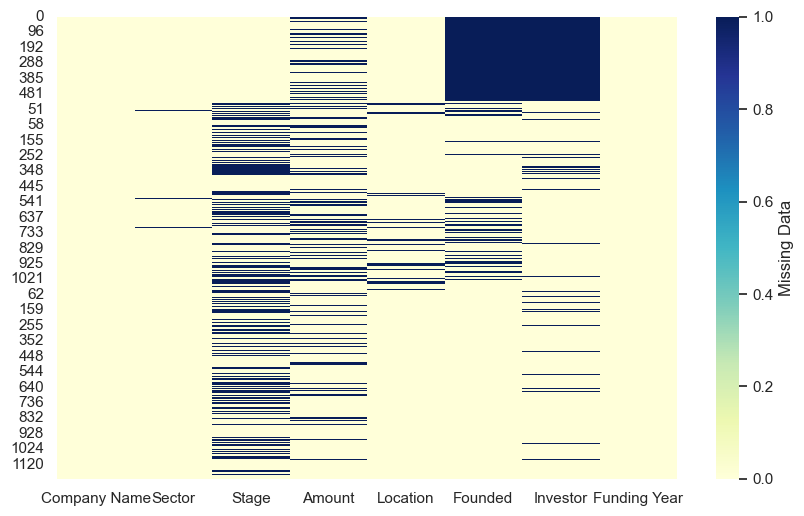

In [881]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [882]:
# check for null values
df.isnull().sum()

Company Name      0
Sector           18
Stage           931
Amount          554
Location        116
Founded         768
Investor        638
Funding Year      0
dtype: int64

In [883]:
# Find the mode of the 'Investor' column
mode = df['Investor'].mode()[0]

# Replace missing values in the 'Investor' column with the mode
df['Investor'].fillna(mode, inplace=True)

In [884]:
# Find the mode of the 'Sector' column
mode_sector = df['Sector'].mode()[0]

# Replace missing values in the 'Sector' column with the mode
df['Sector'].fillna(mode_sector, inplace=True)

In [885]:
# Find the mode of the 'Location' column
mode_location = df['Location'].mode()[0]

#Replace missing values in the 'Location' column with the mode
df['Location'].fillna(mode_location, inplace=True)

In [886]:
# Find the mode of the 'Founded' column
mode_founded = df['Founded'].mode()[0]

# Replace missing values in the 'Founded' column with the mode
df['Founded'].fillna(mode_founded, inplace=True)

In [887]:
# Find the mode of the 'Stage' column
mode_stage = df['Stage'].mode()[0]

# Replace missing values in the 'Stage' column with the mode
df['Stage'].fillna(mode_stage, inplace=True)

Due to the skewed nature and presence of outliers in the 'Amount' column data, opting to fill the missing values with the mode is more suitable. This choice ensures a better representation of the most frequently occurring value in the dataset.

In [888]:
# Find the mode of the 'Amount' column
mode_amount = df['Amount'].mode()[0]

# Replace missing values in the 'Amount' column with the mode
df['Amount'].fillna(mode_amount, inplace=True)

In [889]:
# drop the NaN values
df = df.dropna()

In [890]:
# very null values
df.isna().sum()

Company Name    0
Sector          0
Stage           0
Amount          0
Location        0
Founded         0
Investor        0
Funding Year    0
dtype: int64

<Axes: >

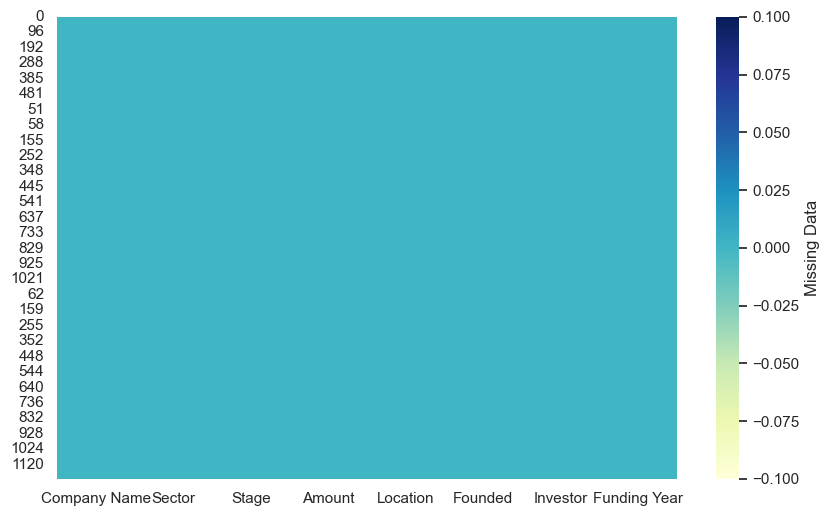

In [891]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

## Univariate Analysis
Univariate analysis' involves examining one variable individually. This examination entails calculating statistical metrics and creating visual representations, achieved through methods such as .describe() from the pandas dataframe and utilizing plotting libraries like [Seaborn](https://seaborn.pydata.org/),[Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

Analysis of the Amount attribute

In [892]:
df['Amount'].head()

0     250000.0
1     480000.0
2     780000.0
3    2000000.0
4    1000000.0
Name: Amount, dtype: float64

In [893]:
# calculate basic statistical measures
mean = df['Amount'].mean()
median = df['Amount'].median()
mode = df['Amount'].mode()
std_dev = df['Amount'].std()
min_val = df['Amount'].min()
max_val = df['Amount'].max()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard Deviation: ", std_dev)
print("Minimum Value: ", min_val)
print("Maximum Value: ", max_val)

Mean:  97821064.2934215
Median:  1500000.0
Mode:  0    1000000.0
Name: Amount, dtype: float64
Standard Deviation:  3088827534.4139576
Minimum Value:  720.0
Maximum Value:  150000000000.0


Given that the mean surpasses the mode, it indicates a positive skewness or right-skewed distribution. In a positively skewed distribution, the mean is influenced towards the tail with larger values, whereas the mode represents the most frequent, usually smaller, value closer to the distribution center. Consequently, in this scenario, the data distribution is more spread towards the right side.

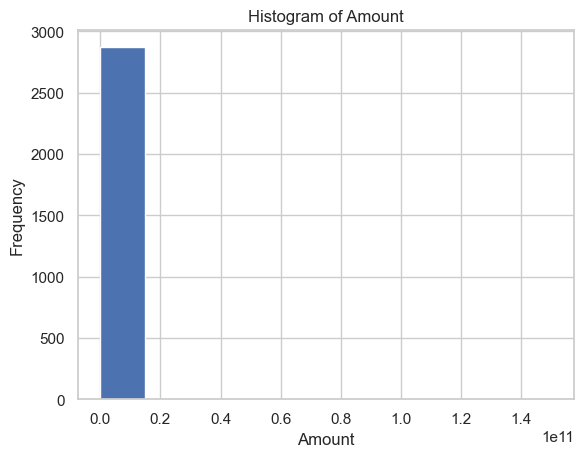

In [894]:
# create a histogram
plt.hist(df['Amount'])
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()

<Axes: xlabel='Amount'>

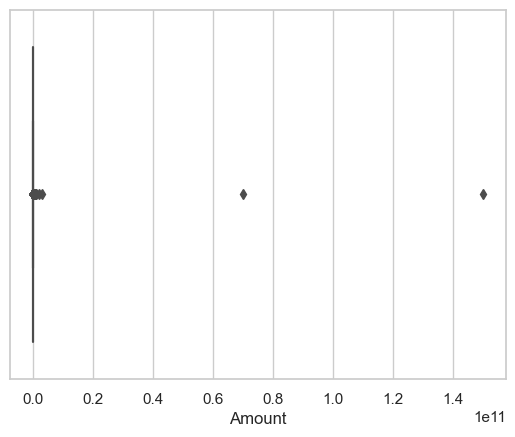

In [895]:
sns.boxplot(data=df, x='Amount')


<Axes: xlabel='Amount', ylabel='Density'>

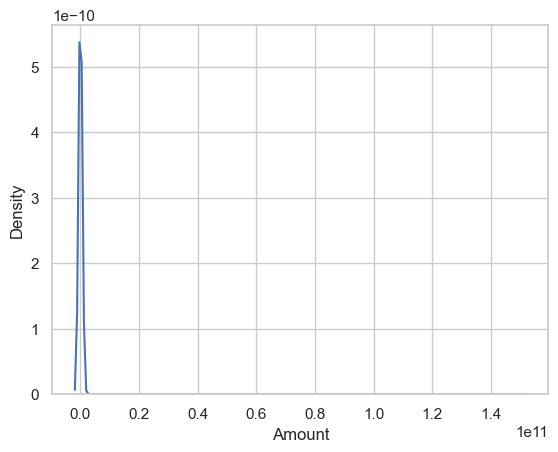

In [896]:
sns.kdeplot(df['Amount'])

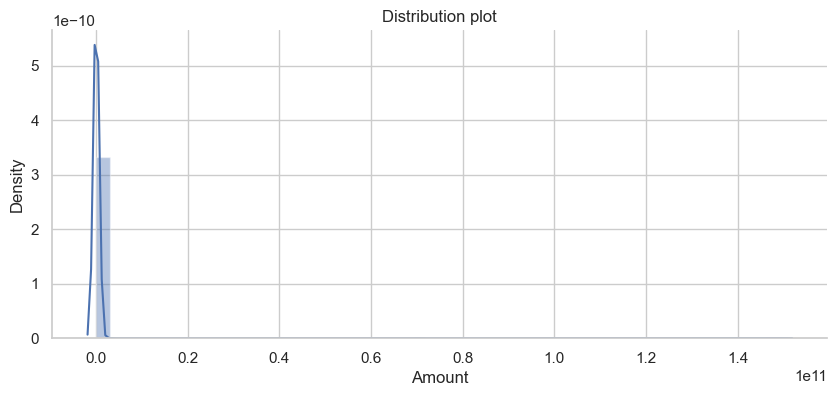

In [897]:
    plt.figure(figsize=(10, 4))
    
    sns.distplot(df['Amount'])
    plt.title("Distribution plot")
    sns.despine()
    plt.show()

##### Outlier Analysis 

Z-scores indicate how many standard deviations an observation is from the mean. Outliers typically have a z-score of greater than 3 or less than -3.

In [898]:


# Assuming df is your DataFrame and 'Amount' is the column you want to calculate z-scores for
z_scores = stats.zscore(df['Amount'])

# Identify and replace outliers based on a threshold, e.g., z_score_threshold = 3
z_score_threshold = 3
outliers = (z_scores > z_score_threshold) | (z_scores < -z_score_threshold)

# Replace outliers with the median of the 'Amount' column
df.loc[outliers, 'Amount'] = df['Amount'].median()


In [899]:
# calculate z-scores
z_scores = stats.zscore(df['Amount'])

In [900]:
# Define a threshold for identifying outliers,z_score_threshold = 3
outliers = (z_scores > 3) | (z_scores < -3)



In [901]:
# remove the outliers
df =df.drop(df.index[outliers])

In the context of positively skewed data, where the distribution exhibits a longer right tail, the mean surpasses the median. In such instances, opting for the median as a replacement for outliers might be more suitable, given its resilience to the influence of outliers.

In [902]:


# Calculate z-scores
z_scores = stats.zscore(df['Amount'])

# Set a threshold for outliers 
outliers = (z_scores > 3) | (z_scores < -3)

# Replace outliers with the median
df.loc[outliers, 'Amount'] = df['Amount'].median()


<Axes: xlabel='Amount'>

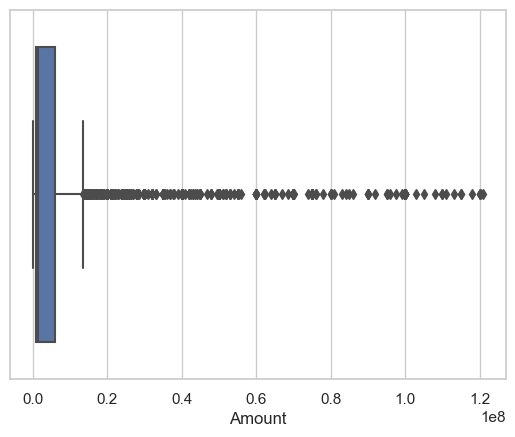

In [903]:
sns.boxplot(data=df, x='Amount')

Analysis of the Founded attribute

In [904]:
# remove rows with missing values
df.dropna(subset=['Founded'], inplace=True)


In [905]:
# calculate basic statistical measures
mean = df['Founded'].mean()
median = df['Founded'].median()
mode = df['Founded'].mode()
std_dev = df['Founded'].std()
min_val = df['Founded'].min()
max_val = df['Founded'].max()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard Deviation: ", std_dev)
print("Minimum Value: ", min_val)
print("Maximum Value: ", max_val)

Mean:  2016.9255930984903
Median:  2018.0
Mode:  0    2019.0
Name: Founded, dtype: Float64
Standard Deviation:  3.8402848545249064
Minimum Value:  1963.0
Maximum Value:  2021.0


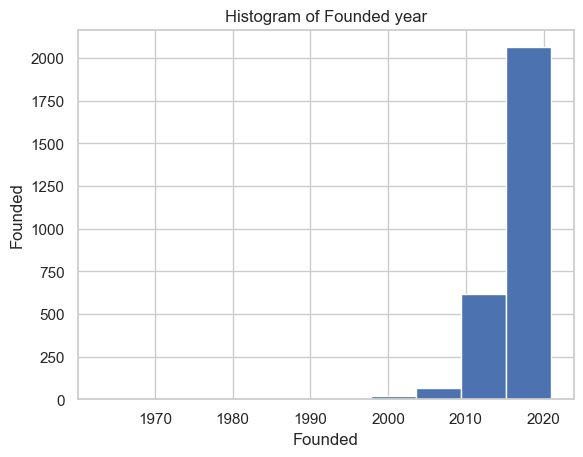

In [906]:
# create a histogram
plt.hist(df['Founded'])
plt.xlabel('Founded')
plt.ylabel('Founded')
plt.title('Histogram of Founded year')
plt.show()

<Axes: xlabel='Founded'>

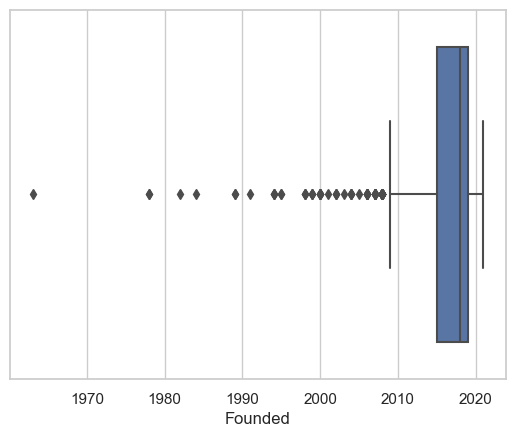

In [907]:
#sns.boxplot(startup_funding_Full['Founded'])
sns.boxplot(data=df, x='Founded')

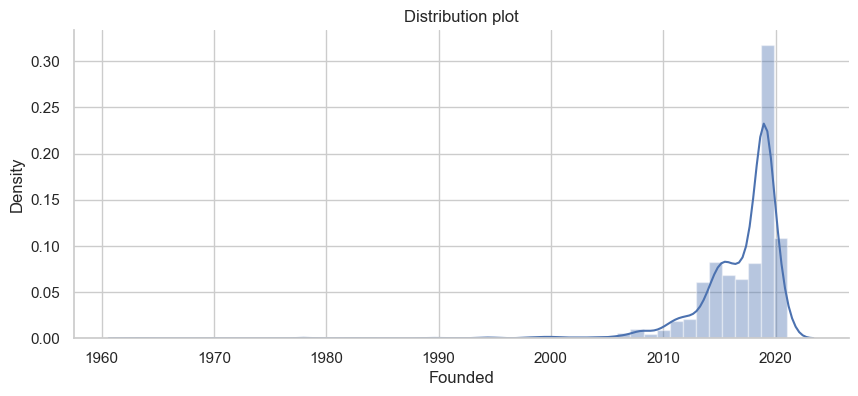

In [908]:
    plt.figure(figsize=(10, 4))
    
    sns.distplot(df['Founded'])
    plt.title("Distribution plot")
    sns.despine()
    plt.show()

Analysis of the Stage attribute

In [909]:
# dispaly the first 5 values in Stage column
df['Stage'].head()

0        Seed
1        Seed
2    Series A
3       Angel
4        Seed
Name: Stage, dtype: object

In [910]:
#  check the unique values in the stage column
df['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series C', 'Series E',
       'Corporate Round', '', 'Series D', 'Secondary Market',
       'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round',
       'Fresh funding', 'Pre series A', 'Series G', 'Post series A',
       'Seed funding', 'Seed fund', 'Series F', 'Series B+',
       'Pre-series A', 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Series H', 'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Seed round', 'Pre-seed Round', 'Seed Round & Series A',
       'Pre Series A', 'Pre seed Round', 'Angel Round', 'Pre series A1',
       'Series E2', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed+', 'Series F2',

In [911]:
# The first 5 percentage distribution of each unique value in the stage column 
(df["Stage"].value_counts(normalize=True)*100).head()

Stage
Seed            53.127247
Series A        10.747664
Pre-series A     7.476636
Series B         4.780733
Series C         4.061826
Name: proportion, dtype: float64

In [912]:
# The last 5 percentage distribution of each unique value in the stage column 
(df["Stage"].value_counts(normalize=True)*100).tail()

Stage
Post series A            0.035945
Fresh funding            0.035945
Funding Round            0.035945
Non-equity Assistance    0.035945
Series I                 0.035945
Name: proportion, dtype: float64

This code generates a donut chart illustrating the top 5 values within the 'Stage' column. The size of each segment corresponds to the count of occurrences for the respective stage. The central void in the donut visually signifies the percentage of stages beyond the top 5 that are not depicted.

In [913]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
stage_counts = df.groupby('Stage')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
top_5_stages = stage_counts.sort_values(by='Amount', ascending=False).head()


In [914]:
# Create the donut chart
fig = px.pie(top_5_stages, values='Amount', names='Stage', hole=.4)
fig.show()

In [915]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
stage_counts = df.groupby('Stage')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
low_5_stages = stage_counts.sort_values(by='Amount', ascending=False).tail()
low_5_stages

,Stage,Amount
9,Early seed,1
44,Seed Round & Series A,1
45,Seed fund,1
48,Seed+,1
42,Seed Investment,1


In [916]:
# Create the donut chart
fig = px.pie(low_5_stages, values='Amount', names='Stage', hole=.4)
fig.show()

##### Analysis of the Sector attribute 

In [917]:
df['Sector'].head()

0         brand marketing
1             agriculture
2                  credit
3      financial services
4    e-commerce platforms
Name: Sector, dtype: object

In [918]:
# The first 5 percentage distribution of each unique value in the sector column 
(df["Sector"].value_counts(normalize=True)*100).head()

Sector
fintech               9.741193
edtech                7.476636
e-commerce            3.378864
financial services    3.055356
healthcare            2.408339
Name: proportion, dtype: float64

In [919]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Sector_counts =df.groupby('Sector')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Sector_counts = Sector_counts.sort_values(by='Amount', ascending=False).head(5)


In [920]:
# Create the donut chart
fig = px.pie(Sector_counts, values='Amount', names='Sector', hole=.4)

fig.show()

In [921]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Sector_counts = df.groupby('Sector')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Sector_counts = Sector_counts.sort_values(by='Amount', ascending=False).tail(5)

# Create the donut chart
fig = px.pie(Sector_counts, values='Amount', names='Sector', hole=.4)

fig.show()


##### Analysis of the Location attribute 

In [922]:
df['Location'].head()

0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
4    Hyderabad
Name: Location, dtype: object

In [923]:
# The first 5 percentage distribution of each unique value in the Location column 
(df["Location"].value_counts(normalize=True)*100).head()

Location
Bangalore    33.932423
Mumbai       16.391086
Gurugram      8.231488
New Delhi     8.123652
Pune          3.774263
Name: proportion, dtype: float64

In [924]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Location_counts = df.groupby('Location')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Location_counts = Location_counts.sort_values(by='Amount', ascending=False).head(5)


In [925]:
# Create the donut chart
fig = px.pie(Location_counts, values='Amount', names='Location', hole=.4)

fig.show()

In [926]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Location_counts = df.groupby('Location')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Location_counts = Location_counts.sort_values(by='Amount', ascending=False).tail(5)

In [927]:
# Create the donut chart
fig = px.pie(Location_counts, values='Amount', names='Location', hole=.4)

fig.show()

##### Analysis of the Investor attribute 


In [928]:
df['Investor'].head()

0    Inflection Point Ventures
1    Inflection Point Ventures
2    Inflection Point Ventures
3    Inflection Point Ventures
4    Inflection Point Ventures
Name: Investor, dtype: object

In [929]:
# The first 5 percentage distribution of each unique value in the Investor column 
(df["Investor"].value_counts(normalize=True)*100).head()

Investor
Inflection Point Ventures    23.256650
Venture Catalysts             1.150252
Mumbai Angels Network         0.539180
Angel investors               0.539180
Titan Capital                 0.395399
Name: proportion, dtype: float64

In [930]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Investor_counts = df.groupby('Investor')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Investor_counts = Investor_counts.sort_values(by='Amount', ascending=False).head(5)

# Create the donut chart
fig = px.pie(Investor_counts, values='Amount', names='Investor', hole=.4)

fig.show()

In [931]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Investor_counts = df.groupby('Investor')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Investor_counts = Investor_counts.sort_values(by='Amount', ascending=False).tail(5)

Investor_counts

,Investor,Amount
696,"InnoVen Capital, InnoVen Capita",1
695,"InnoVen Capital, Bertelsmann India Investments",1
110,"Al Falaj Commercial Investment Co, Vistra ITCL...",1
693,Infrastructure Leasing & Financial Services Li...,1
1728,velocity.in,1


In [970]:
# Create the donut chart

fig = px.pie(Investor_counts, values='Amount', names='Investor', hole=.4)
fig.show()

## MUltivariate Analysis

Multivariate analysis involves the examination of multiple variables to investigate their interrelationships. This analytical approach includes the computation of statistical measures such as 'correlation' and the creation of charts to visualize the connections between these variables.

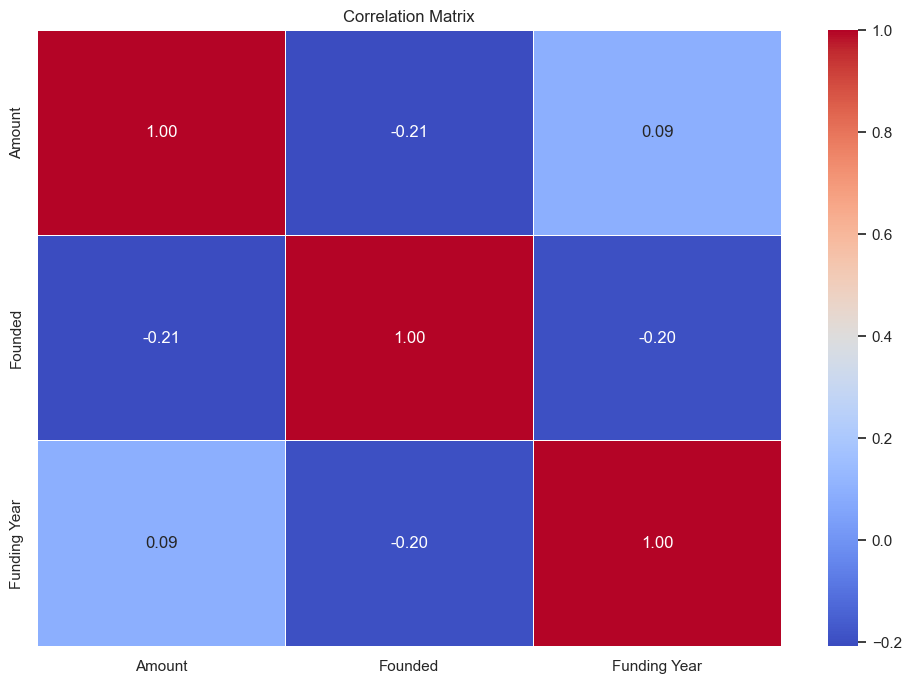

In [933]:
#Check correlation between various attributes in the datatset
numeric_df = df.select_dtypes(include=['float64', 'int32','int64'])
correlation = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [934]:
#show pairwise correlations between the numeric attributes
corr_matrix=numeric_df.corr()

corr_matrix

,Amount,Founded,Funding Year
Amount,1.000000,-0.207102,0.090806
Founded,-0.207102,1.000000,-0.195582
Funding Year,0.090806,-0.195582,1.000000


In [935]:
# sort with the most strongly correlated at top
corr_matrix["Amount"].sort_values(ascending=False)

Amount          1.000000
Funding Year    0.090806
Founded        -0.207102
Name: Amount, dtype: float64

<Axes: xlabel='Amount', ylabel='Funding Year'>

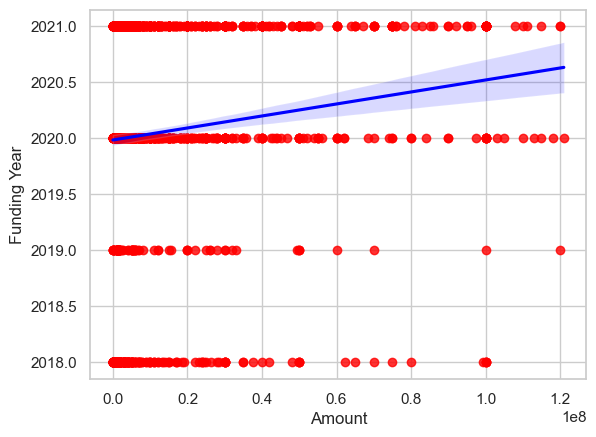

In [936]:
# relationship between Amount and Fundinyear using scatter plot
sns.regplot(x='Amount', y='Funding Year', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

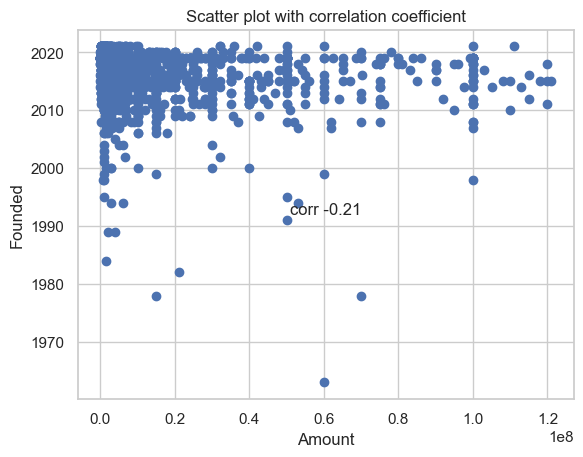

In [937]:
# Scatter plot with correlation coefficient
x = df['Amount']
y = df['Founded']

corr, _ = pearsonr(x, y)
plt.scatter(x, y)
plt.xlabel('Amount')
plt.ylabel('Founded')
plt.title('Scatter plot with correlation coefficient')
plt.annotate(f'corr {corr:.2f}', (0.5, 0.5), xycoords='axes fraction', ha='center')
plt.show()


In [938]:
# Create a contingency table
table = pd.crosstab(df['Sector'], df['Stage'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# Print the test statistic and p-value
print("Chi-square test statistic:", chi2)
print("p-value:", p)

Chi-square test statistic: 34723.552763695414
p-value: 1.0


A low p-value, often below 0.05, suggests a notable association between the variables, indicating that they are not independent.

# Feature processing

In this section we further **clean** and **process** the features of the dataset.

In [939]:
# create a new attribute called startup age 
df["Startup_Age"] = abs(df["Funding Year"] - df["Founded"])

In [940]:
# Show the first 4 records 
df.head()

,Company Name,Sector,Stage,Amount,Location,Founded,Investor,Funding Year,Startup_Age
0,TheCollegeFever,brand marketing,Seed,250000.0,Bangalore,2019.0,Inflection Point Ventures,2018,1.0
1,Happy Cow Dairy,agriculture,Seed,480000.0,Mumbai,2019.0,Inflection Point Ventures,2018,1.0
2,MyLoanCare,credit,Series A,780000.0,Gurgaon,2019.0,Inflection Point Ventures,2018,1.0
3,PayMe India,financial services,Angel,2000000.0,Noida,2019.0,Inflection Point Ventures,2018,1.0
4,Eunimart,e-commerce platforms,Seed,1000000.0,Hyderabad,2019.0,Inflection Point Ventures,2018,1.0


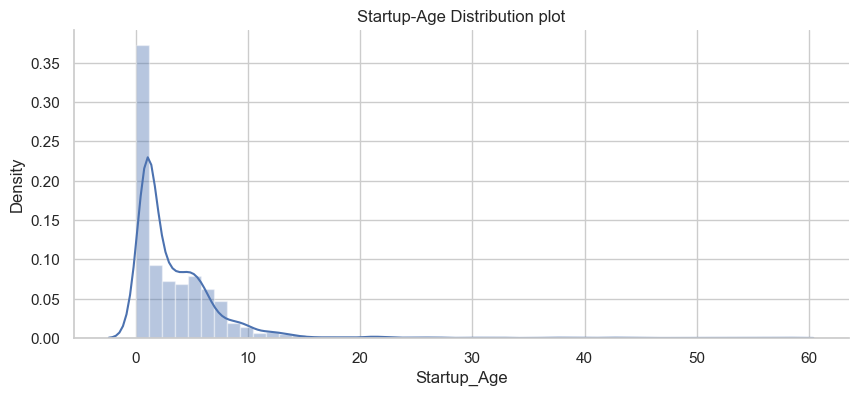

In [941]:
    plt.figure(figsize=(10, 4))
    
    sns.distplot(df['Startup_Age'])
    plt.title("Startup-Age Distribution plot")
    sns.despine()
    plt.show()

<Axes: xlabel='Startup_Age'>

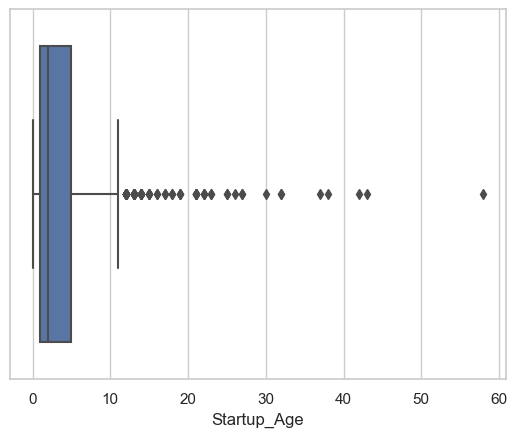

In [942]:
#boxplot 
sns.boxplot(data=df, x='Startup_Age')

<Axes: >

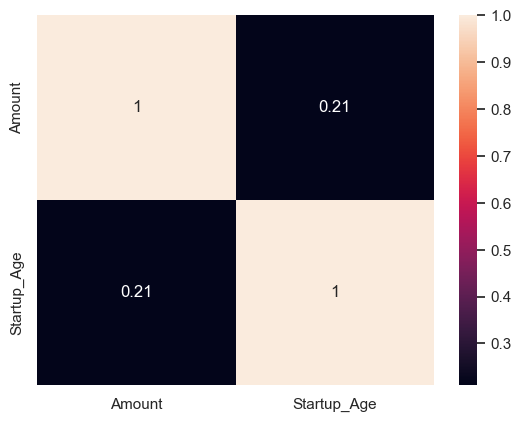

In [943]:
# correlation matrix between Amount and Startup_Age
corr = df[['Amount', 'Startup_Age']].corr()
sns.heatmap(corr, annot=True)

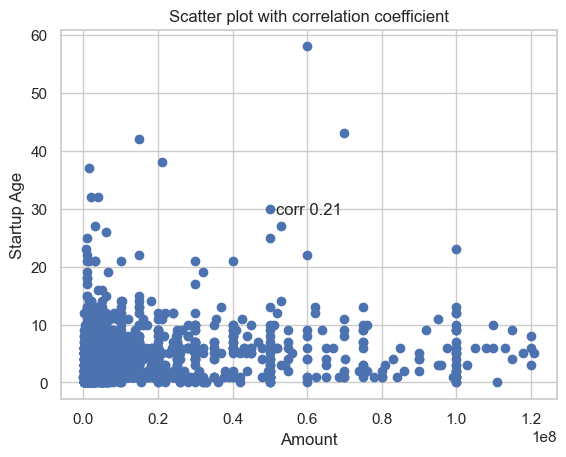

In [944]:
x = df['Amount']
y = df['Startup_Age']

corr, _ = pearsonr(x, y)
plt.scatter(x, y)
plt.xlabel('Amount')
plt.ylabel('Startup Age')
plt.title('Scatter plot with correlation coefficient')
plt.annotate(f'corr {corr:.2f}', (0.5, 0.5), xycoords='axes fraction', ha='center')
plt.show()

### ANSWERING THE BUSINESS QUESTIONS 

QUESTION 1 

Does the type of industry affect the success of getting funded?

In [945]:
# Replace ',' and '&' with '' in the Sector column
sector_analysis = df['Sector'].apply(lambda x: str(x).replace(',', ''))
sector_analysis = sector_analysis.apply(lambda x: str(x).replace('&', ''))
sector_analysis = sector_analysis.apply(lambda x: str(x).replace('startup', ''))
sector_analysis = sector_analysis.apply(lambda x: str(x).replace('technology', ''))

# Concatenate all the words in the sector_analysis series into a single string
txt = sector_analysis.str.lower().str.cat(sep=' ')

words = txt.split()

# Create a dictionary to store the word counts
word_counts = {}

# Loop through the list of words and update the count for each word
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1
        
# Sort the dictionary by the count and get the top 10 words
top_10 = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10])

print(top_10)

{'fintech': 271, 'edtech': 212, 'services': 143, 'e-commerce': 102, 'food': 101, 'tech': 100, 'financial': 86, 'health': 75, 'healthcare': 67, 'saas': 66}


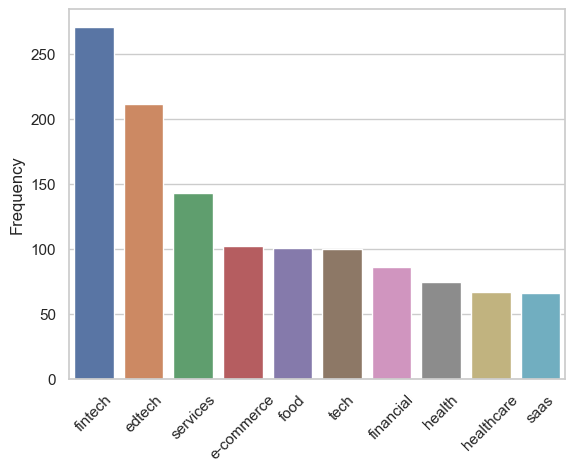

In [946]:
# Create a DataFrame with the top 10 words and their frequencies
top_10_df = pd.DataFrame(top_10.items(), columns=["Word", "Frequency"])

# Use seaborn to create a bar chart

sns.barplot(x='Word', y='Frequency', data=top_10_df)

# Adjust the plot properties
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [947]:
df["Sector"] = df["Sector"].str.lower()
df["Sector"].value_counts(normalize=True)*100
df['Sector']

0             brand marketing
1                 agriculture
2                      credit
3          financial services
4        e-commerce platforms
                ...          
1204    staffing & recruiting
1205         food & beverages
1206       financial services
1207                   edtech
1208       financial services
Name: Sector, Length: 2782, dtype: object

In [948]:
#the list of keywords were generated from the list of top sectors 
#Tech and Technology were removed because they are too generic 
# keyword_totals is a dictionary that store the sum of amounts for a corresponding keyword

df.Sector = df.Sector.astype(str)

keywords = ["fintech", "edtech","services", "food","e-commerce", "health"]

keyword_totals = {}

for keyword in keywords:
    
    keyword_totals[keyword] = df[df['Sector'].apply(lambda x: keyword in x)].Amount.sum()
    


In [949]:
keyword_totals

{'fintech': 3184447500.0,
 'edtech': 1477457730.0,
 'services': 1874606200.0,
 'food': 1203077300.0,
 'e-commerce': 1530172000.0,
 'health': 1666109145.0}

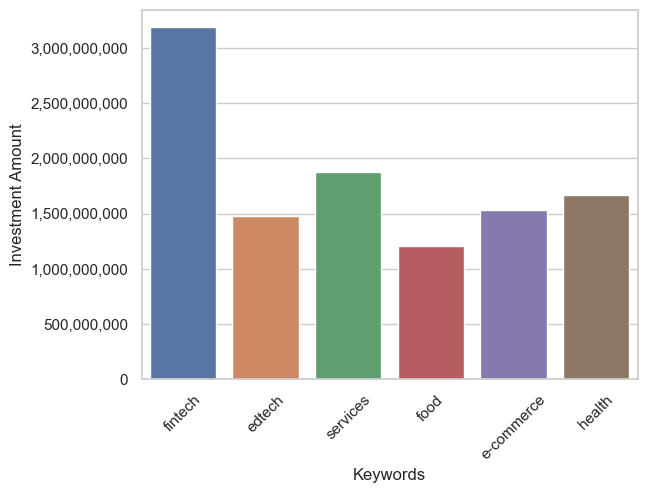

In [950]:
# Create a DataFrame with the keyword totals
keyword_totals_df = pd.DataFrame.from_dict(keyword_totals, orient='index', columns=['Amount'])

# Use seaborn to create a bar chart
ax=sns.barplot(x=keyword_totals_df.index, y='Amount', data=keyword_totals_df)

# format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Adjust the plot properties
plt.xlabel("Keywords")
plt.ylabel("Investment Amount")
plt.xticks(rotation = 45)

# Show the plot
plt.show()

QUESTION 2 

Can location affect the success of receiving funding from investors?

In [951]:
index_new = df.index[df['Location']=='California']
#index_new
Location_data = df.drop(labels=index_new, axis=0)

In [952]:
Location_grp = Location_data.groupby('Location')['Amount'].sum().reset_index()
top_10_locations = Location_grp.sort_values(by = 'Amount', ascending = False).head(10)
top_5_locations = Location_grp.sort_values(by = 'Amount', ascending = False).head(5)
top_10_locations

,Location,Amount
11,Bangalore,1.020648e+10
70,Mumbai,4.044920e+09
39,Gurugram,2.407175e+09
73,New Delhi,1.398311e+09
84,Pune,7.815103e+08
23,Chennai,7.582177e+08
75,Noida,6.066970e+08
38,Gurgaon,5.135726e+08
27,Delhi,4.543402e+08
41,Haryana,4.343938e+08


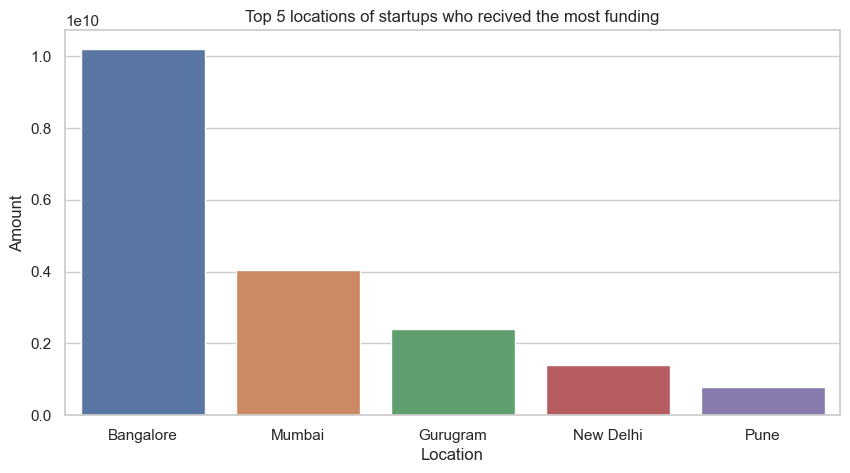

In [953]:
# Create a bar chart using seaborn
fig = plt.figure(figsize = (10, 5))

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='Location', y='Amount', data=top_5_locations)

# Add labels and title
plt.xlabel("Location")
plt.ylabel("Amount")
plt.title("Top 5 locations of startups who recived the most funding")

# format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Show the plot
plt.show()

QUESTION 3: 

At which stage do start-ups get more funding from investors?

In [954]:
stage_data = df.groupby('Stage')['Amount'].sum().reset_index()
top_5_stages = stage_data.sort_values(by = 'Amount', ascending = False).head()
top_5_stages

,Stage,Amount
39,Seed,8.709839e+09
58,Series C,3.862353e+09
54,Series B,2.723507e+09
50,Series A,2.482830e+09
60,Series D,2.236725e+09


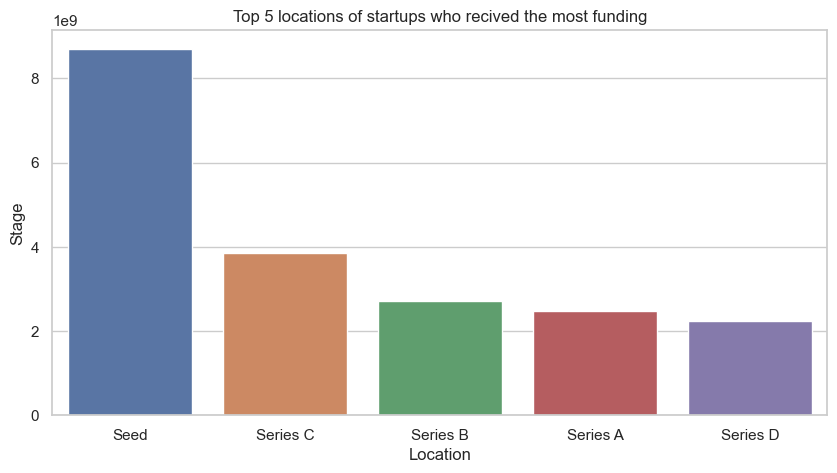

In [955]:
#Visualizing the results of the top 5 stages 

fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(x='Stage', y='Amount', data=top_5_stages)

# Add labels and title
plt.xlabel("Location")
plt.ylabel("Stage")
plt.title("Top 5 locations of startups who recived the most funding")

# format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


# Show the plot
plt.show()


Question 4 

Which type of investors invest the most money?

In [956]:
df["Investor"].value_counts(normalize=True)*100
Investor_data = df.groupby('Investor')['Amount'].sum().reset_index()
Investor_data = Investor_data.sort_values(by = 'Amount', ascending = False)
#top_5_investors
Investor_5_data = Investor_data.head()
Investor_5_data

,Investor,Amount
673,Inflection Point Ventures,3.364187e+09
1485,Tiger Global,5.825000e+08
382,Coatue Management,2.265000e+08
72,"Accel Partners, B Capital",2.025000e+08
899,"MacRitchie Investments, Baillie Gifford",1.620000e+08


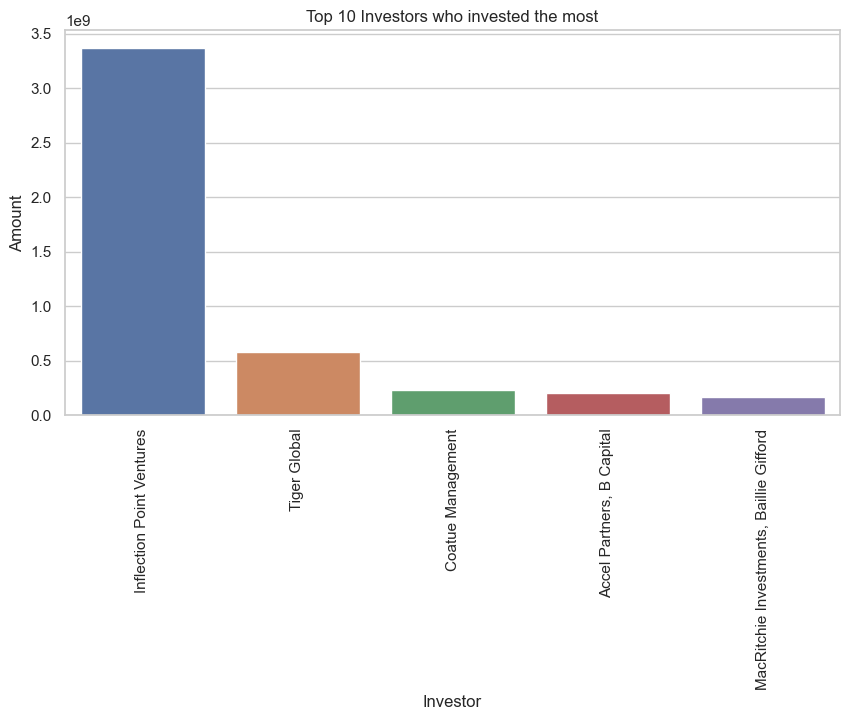

In [957]:
# Create a bar chart using seaborn

fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(x='Investor', y='Amount', data=Investor_5_data)

# Add labels and title
plt.xlabel("Investor")
plt.ylabel("Amount")
plt.title("Top 10 Investors who invested the most")

# Rotate y-labels by 30 degrees
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)


# set y ticks and labels
plt.xticks(rotation = 90)

# Show the plot
plt.show()

In [958]:
#Here we are trying to extract the top 3 sectors with most count of Investors

# Merge the top_10_investors DataFrame with the DataFrame on the 'Investor' column
merged_df = pd.merge(Investor_data, df, on='Investor')

# Group the merged DataFrame by the 'Sector' column and count the occurrences of each sector
investor_sectors = merged_df.groupby('Sector')['Investor'].count()

# Reset the index of the resulting DataFrame and sort the values by count in descending order
investor_sectors = investor_sectors.reset_index().sort_values(by='Investor', ascending=False).head(3)

#print(investor_sectors)

investor_sectors

,Sector,Investor
252,fintech,271
208,edtech,208
197,e-commerce,94


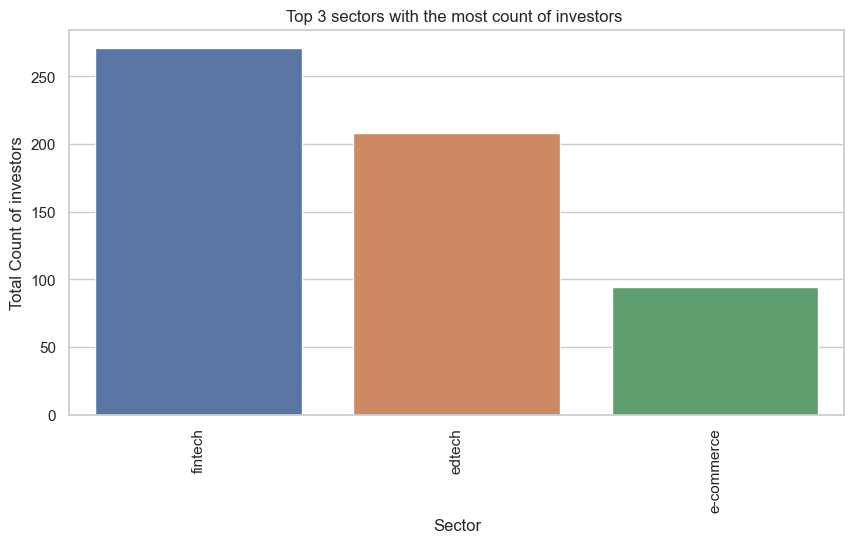

In [959]:
# Create a bar chart using seaborn
fig = plt.figure(figsize = (10, 5))
sns.barplot(x='Sector', y='Investor', data=investor_sectors)

# Add labels and title
plt.xlabel("Sector")
plt.ylabel("Total Count of investors")
plt.title("Top 3 sectors with the most count of investors ")

# Rotate y-labels by 30 degrees
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)


# set y ticks and labels
plt.xticks(rotation = 90)

# Show the plot
plt.show()

In [960]:
#We want to investigate how much money Inflection Point Ventures has invested in fintech
fintech_investments = df[(df['Investor'] == 'Inflection Point Ventures') & (df['Sector'] == 'fintech')]
investment_sum = fintech_investments['Amount'].sum()
print("Inflection Point Ventures has invested", '$', investment_sum, 'in the area of fintech')


Inflection Point Ventures has invested $ 231300000.0 in the area of fintech


In [961]:
#We want to investigate how much money Inflection Point Ventures has invested in fintech
edtech_investments = df[(df['Investor'] == 'Inflection Point Ventures') & (df['Sector'] == 'e-commerce')]
investment_sum = edtech_investments['Amount'].sum()
print("Inflection Point Ventures has invested", '$', investment_sum, 'in the area of e-commerce')


Inflection Point Ventures has invested $ 265720000.0 in the area of e-commerce


QUESTION 5

Can the age of the startup affect the sum of money received from investors ?

In [962]:
top_Startup_Age = df.groupby("Startup_Age")["Amount"].sum().reset_index()
top_5_Startup_Age = top_Startup_Age.sort_values(by = 'Amount', ascending = False).head(5)
top_5_Startup_Age

,Startup_Age,Amount
1,1.0,5.181554e+09
6,6.0,3.174909e+09
5,5.0,2.307556e+09
2,2.0,2.109995e+09
4,4.0,1.983228e+09


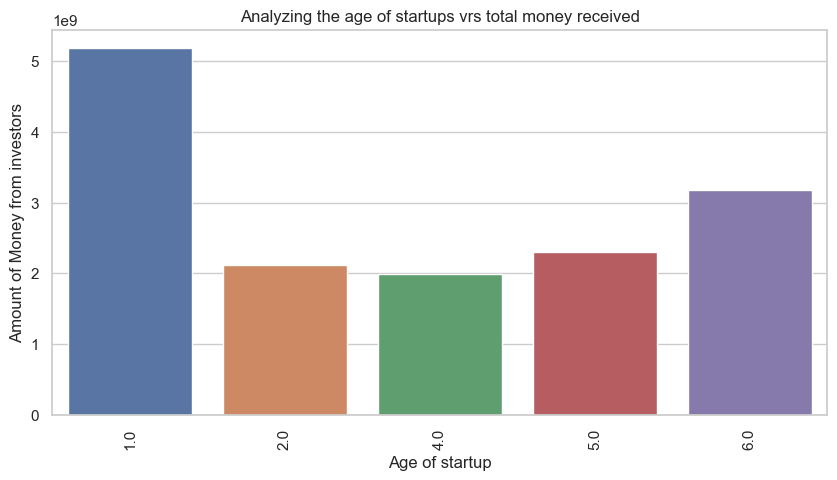

In [963]:
# Create a bar chart using seaborn
fig = plt.figure(figsize = (10, 5))

sns.barplot(x='Startup_Age', y='Amount', data=top_5_Startup_Age)

# Add labels and title
plt.xlabel("Age of startup")
plt.ylabel("Amount of Money from investors")
plt.title("Analyzing the age of startups vrs total money received")

# Rotate y-labels by 30 degrees
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)


# set y ticks and labels
plt.xticks(rotation = 90)

# Show the plot
plt.show()

## Hypothesis: 

###### NULL: Technological industries do not have a higher success rate of being funded 

###### ALTERNATE: Technological industries have a higher success rate of being funded


As our hypothesis revolves around two distinct groups, namely Technological and Non-Technological, we have compiled a list of keywords related to technology, such as Fintech, edtech, robotics, etc. This list was manually curated by examining the sector attribute of the entire dataset.

In [964]:
# Define the keywords
keywords = ["fintech", "edtech", "e-commerce","robotics", "cryptocurrency", "esports",
            "automotive ", "engineering ","telecommunications", "electricity", 
            "agritech", "healthtech", "technology", "e-marketplace", "social", 
            "tech", "gaming", "computer", "femtech", "solar", "embedded ", 
            "software ", "saas ", "e-commerce", "analytics", "ar", "vr", "crm", "nft", 
            "e-learning", "iot", "e-commerce", "e-mobility", "api ", 
            "ecommerce", "media", "ai","sportstech", "traveltech", "online", 
            "information", "automobile", "e-commerce", "biotechnology", "applications",  
            "it", "edtech", "energy", "computer", "agritech", "online ", "virtual ", 
            "fintech", "internet", "automation", "cloud", "apps", "chatbot", 
            "digital", "cleantech", "ev", "manufacturing","networking", "mobile ", 
            "electronics", "logitech", "solar", "insurtech","finance", "electric", 
            "fmcg", "intelligence", "blockchain","crypto", "foodtech ", "audio ", 
            "nanotechnology", "biometrics", "auto-tech", "biotech", "data ",  "autonomous ", 
            "AI", "machine learning", "e-market", "proptech", "machine learning "]


In [965]:
def check_keywords(string, keywords):
    for keyword in keywords:
        if keyword in string:
            return "technology"
    return "non-technology"

In [966]:
# Select only the rows with non-null values in the Sector column
df = df[df["Sector"].notnull()]

# Convert the Sector column to a Pandas Series
sector_series = pd.Series(df["Sector"])

# Apply the check_keywords function to the Series
sector_series = sector_series.apply(check_keywords, keywords=keywords)

# Convert the resulting Series back to a column in the DataFrame
df["label"] = sector_series


In [967]:
#Count the occurance of each unique term in the label column 

df["label"].value_counts(normalize=True)*100

label
technology        73.220705
non-technology    26.779295
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x2634dd66a70>,
 [Text(-0.7331466554671313, 0.8200585232636508, 'Technology '),
  Text(0.7331466554671315, -0.8200585232636505, 'Non-technology ')],
 [Text(-0.39989817570934433, 0.4473046490529004, '73.2%'),
  Text(0.39989817570934444, -0.4473046490529002, '26.8%')])

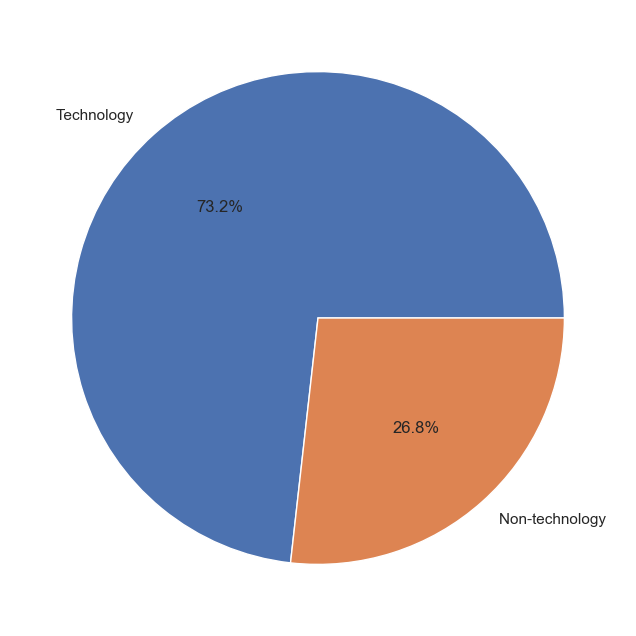

In [968]:
#A pie chart to show the distribution of the two labels 

plt.subplots(figsize = (10,8))
label = ['Technology ', 'Non-technology ']
label_data = df["label"].value_counts()

plt.pie(label_data, labels=label, autopct='%1.1f%%')

The t-test statistic quantifies the disparity between the means of two groups, while the p-value signifies the likelihood that this difference arises by random chance. A diminutive p-value, typically below 0.05, suggests a statistically significant difference between the means, making it improbable that the disparity is a result of chance.

In [980]:
# Extract the funding amounts for the tech and non-tech groups
tech_amounts = df[df['label'] == 'technology']['Amount']
non_tech_amounts = df[df['label'] == 'non-technology']['Amount']

# Perform the t-test
t_test_result = stats.ttest_ind(tech_amounts,non_tech_amounts)

# Print the test statistic and p-value
print("T-test statistic: ", t_test_result.statistic)
print("P-value: ", t_test_result.pvalue)

T-test statistic:  0.6751805987317313
P-value:  0.49961718241824016


In [973]:
df.head()

,Company Name,Sector,Stage,Amount,Location,Founded,Investor,Funding Year,Startup_Age,label
0,TheCollegeFever,brand marketing,Seed,250000.0,Bangalore,2019.0,Inflection Point Ventures,2018,1.0,technology
1,Happy Cow Dairy,agriculture,Seed,480000.0,Mumbai,2019.0,Inflection Point Ventures,2018,1.0,non-technology
2,MyLoanCare,credit,Series A,780000.0,Gurgaon,2019.0,Inflection Point Ventures,2018,1.0,technology
3,PayMe India,financial services,Angel,2000000.0,Noida,2019.0,Inflection Point Ventures,2018,1.0,non-technology
4,Eunimart,e-commerce platforms,Seed,1000000.0,Hyderabad,2019.0,Inflection Point Ventures,2018,1.0,technology


In [983]:
# Set the float format to a custom function that formats the number as a string without the exponential notation

pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))

group_obj = df["Amount"].groupby(df["label"]).agg(['max','mean', 'sum'])

group_obj

,max,mean,sum
label,,,
non-technology,108000000,8263049,6155971174
technology,121000000,8793852,17913076321


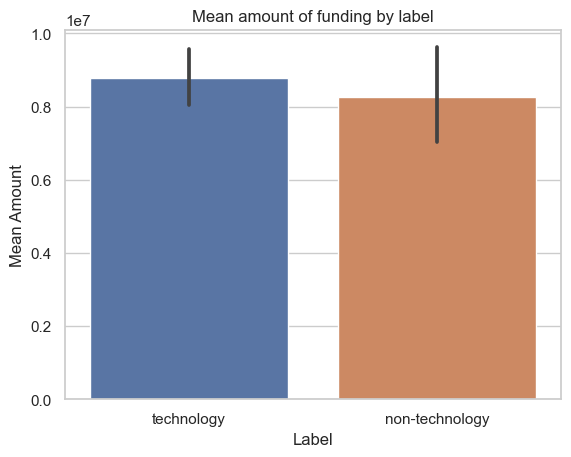

In [984]:
# Create a bar chart of the mean 'Amount' grouped by 'label'
sns.barplot(x='label', y='Amount', data=df, estimator=np.mean)

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Mean Amount")
plt.title("Mean amount of funding by label")

# Show the plot
plt.show()

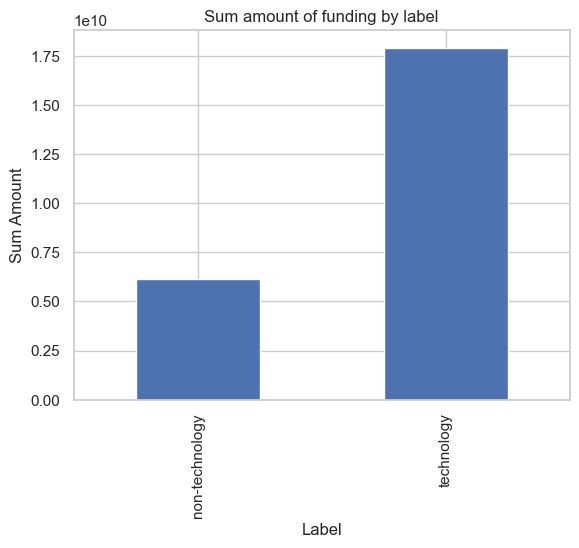

In [985]:
sum_value = df["Amount"].groupby(df["label"]).sum().plot.bar()

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Sum Amount")
plt.title("Sum amount of funding by label")

# Show the plot
plt.show()

Technological industries have a higher success rate of being funded is true. Technological industries have recived 

## Dataset Overview

In [991]:
#replace undisclosed element in the  investor column to NAN 
df['Investor'] = df['Investor'].replace('Undisclosed', np.nan)

In [992]:
#replace undisclosed element in the  Location column to NAN 
df['Location'] = df['Location'].replace('Plano', np.nan)

In [993]:
df['Location'] = df['Location'].replace('Newcastle Upon Tyne', np.nan)

<Axes: >

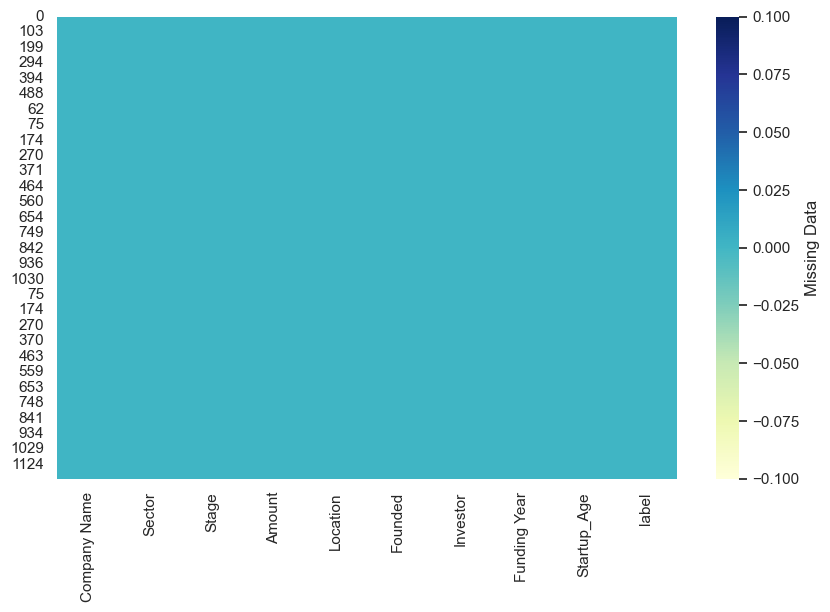

In [995]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [996]:
# check for null values
df.isnull().sum()

Company Name    0
Sector          0
Stage           0
Amount          0
Location        0
Founded         0
Investor        0
Funding Year    0
Startup_Age     0
label           0
dtype: int64

In [997]:
# calculate basic statistical measures
mean = df['Amount'].mean()
median = df['Amount'].median()
mode = df['Amount'].mode()
std_dev = df['Amount'].std()
min_val = df['Amount'].min()
max_val = df['Amount'].max()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard Deviation: ", std_dev)
print("Minimum Value: ", min_val)
print("Maximum Value: ", max_val)


Mean:  8651706.504313443
Median:  1500000.0
Mode:  0   1000000
Name: Amount, dtype: float64
Standard Deviation:  18359730.127884194
Minimum Value:  1200.0
Maximum Value:  121000000.0


Given that the mean surpasses the mode, it indicates a positive skew or right-skewness in the data. This phenomenon arises when the mean is influenced by the presence of larger values, extending the tail of the distribution to the right. Meanwhile, the mode represents the most frequently occurring value, often situated closer to the center of the distribution, which, in this context, tends to be smaller. Consequently, the data distribution is more dispersed towards the right side.

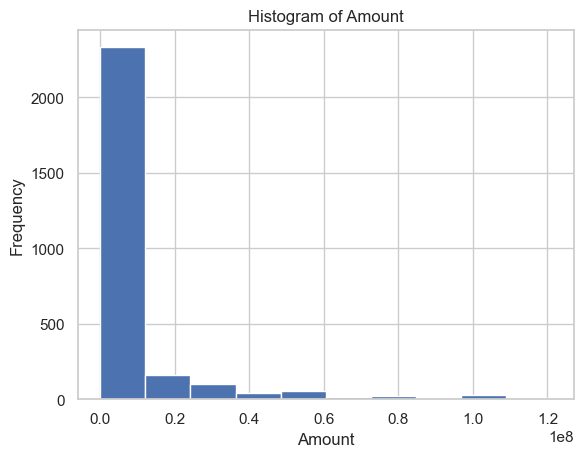

In [998]:
# create a histogram
plt.hist(df['Amount'])
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()


<Axes: xlabel='Amount'>

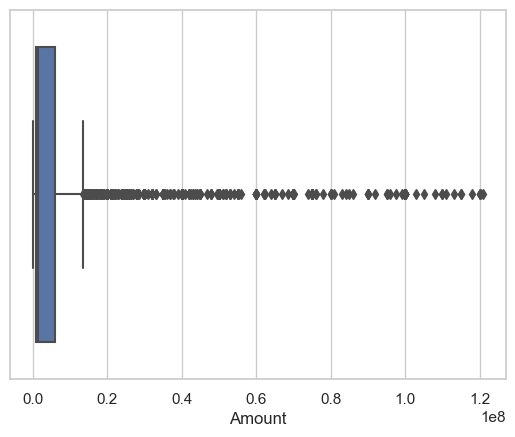

In [999]:
# create a boxplot
sns.boxplot(data=df, x='Amount')

<Axes: xlabel='Amount', ylabel='Density'>

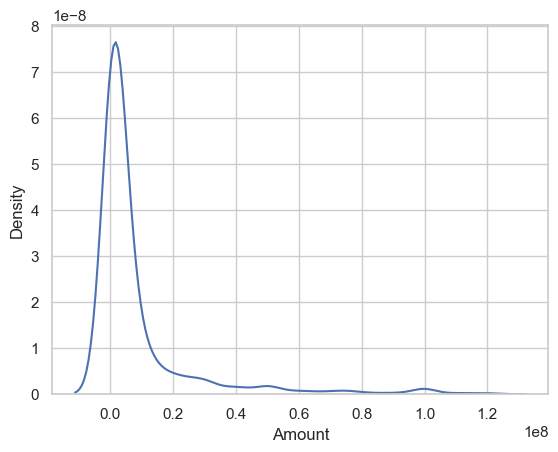

In [1000]:
sns.kdeplot(df['Amount'])

##### Outlier Analysis 

Z-scores indicate how many standard deviations an observation is from the mean. Outliers typically have a z-score of greater than 3 or less than -3.

In [1002]:
# calculate z-scores
z_scores = stats.zscore(df['Amount'])


### MAJOR TAKEAWAY

Prior to reaching a decision, it is essential to thoroughly examine the outcomes of the hypothesis to eliminate any uncertainties. Informed decision-making relies on leveraging data to guide significant business choices. Delving deeper into the data entails establishing a threshold, subsequently tallying the count of technology and non-technology companies, and assessing both the mean and sum.

In [1003]:
# set threshold as the average amount
threshold = df['Amount'].mean()

# create a new column 'above_threshold' that indicates whether the amount is above the threshold
df['above_threshold'] = df['Amount'] > threshold

# group by label and above_threshold and count the number of companies
counts = df.groupby(['label', 'above_threshold']).size().reset_index(name='counts')

# group by label and above_threshold and find the sum and mean of the amount column
sums = df.groupby(['label', 'above_threshold'])['Amount'].sum().reset_index(name='sums')
means = df.groupby(['label', 'above_threshold'])['Amount'].mean().reset_index(name='means')

counts

,label,above_threshold,counts
0,non-technology,False,596
1,non-technology,True,149
2,technology,False,1606
3,technology,True,431


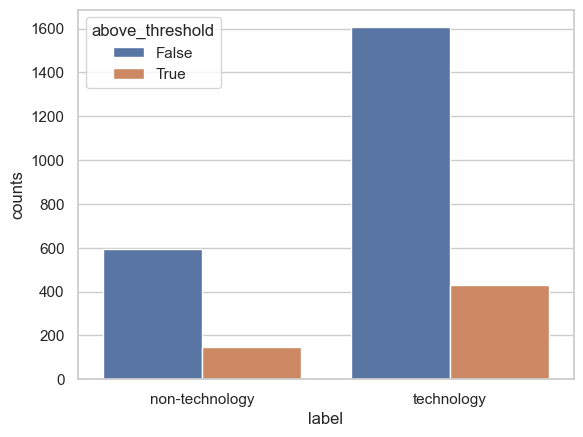

In [1004]:
# create a barplot
sns.barplot(x='label', y='counts', hue='above_threshold', data=counts)
plt.show()

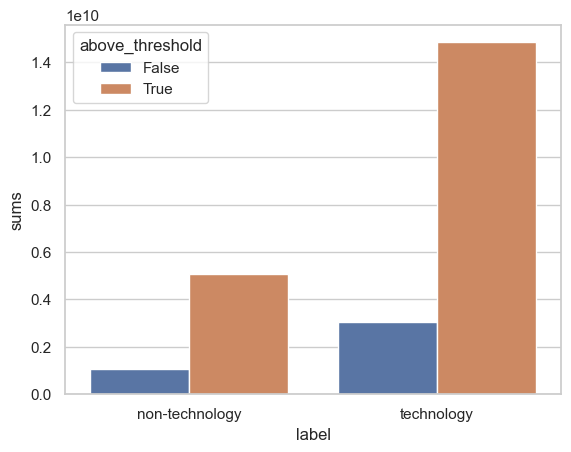

In [1005]:
sns.barplot(x='label', y='sums', hue='above_threshold', data=sums)
plt.show()

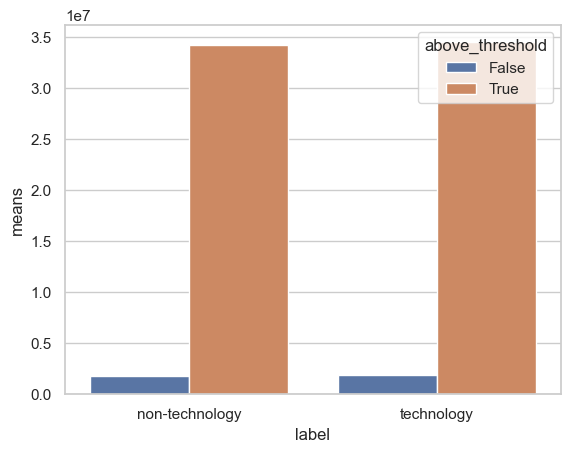

In [1006]:
sns.barplot(x='label', y='means', hue='above_threshold', data=means)
plt.show()

In [1007]:
Max_value = df['Amount'].max()
index_new = df.index[df['Amount']== Max_value]
df.loc[index_new]

,Company Name,Sector,Stage,Amount,Location,Founded,Investor,Funding Year,Startup_Age,label,above_threshold
195,HeyHolidays,tourism,Seed,1000000,Bangalore,2019,Inflection Point Ventures,2018,1,non-technology,False
195,FreshtoHome,e-commerce,Series C,121000000,Bangalore,2015,"Ascent Capital, Iron Pillar",2020,5,technology,True
195,RenewBuy,fintech,Series C,10000000,Gurugram,2015,Evolvence Capital,2021,6,technology,True


In [1008]:
Min_value = df['Amount'].min()
index_new = df.index[df['Amount']== Min_value]
df.loc[index_new]

,Company Name,Sector,Stage,Amount,Location,Founded,Investor,Funding Year,Startup_Age,label,above_threshold
98,Next Digital Solutions,digital marketing,Angel,1200,Kota,2019,Inflection Point Ventures,2018,1,technology,False
98,NewsReach,digital media,Seed,1500000,Gujarat,2018,"Mumbai Angels, JITO Angel Network.",2020,2,technology,False
98,FanPlay,computer games,,1200000,,2020,"Pritesh Kumar, Bharat Gupta",2021,1,technology,False
164,Classworks India,education,,1200,Chennai,2019,Inflection Point Ventures,2018,1,non-technology,False
164,FrontRow,edtech,Seed,3200000,Bangalore,2019,"Lightspeed, Elevation, Deepika Padukone",2020,1,technology,False
164,Zupee,gaming,Seed,30000000,Gurugram,2018,"WestCap Group, Tomales Bay Capital",2021,3,technology,True


Key Insights:

India's startup landscape is robust and optimistic, showing a clear inclination toward technology-driven companies while providing equal prospects for non-technical sectors.
Fintech and edtech emerge as highly dynamic sectors in the Indian startup ecosystem, with Mumbai playing a prominent role in these advancements.
Noteworthy investments in non-technical sectors contribute to an elevated mean, whereas the technology sector exhibits a higher count of smaller investments, leading to an increased overall sum.